# Actividad

- **Nombre**: Juan Manuel Gomez
- **Matrícula**: A00828010

# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Todas las tareas entregadas fuera de la fecha limite se califican sobre 50 de los 100 puntos posibles.


In [ ]:

from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
%cd 'drive/MyDrive/SemanaTec/Repos/arte-analitica'

/content/drive/MyDrive/SemanaTec/Repos/arte-analitica


**Presion Arterial**

1. Carga los datos del archivo **presion.csv**

In [ ]:
presion = pd.read_csv('data/presion.csv', )
presion.head()

,edad,presion,Unnamed: 2
0,56,148,NaN
1,45,120,NaN
2,72,159,NaN
3,36,118,NaN
4,63,146,NaN


2. Gráfica la información en el eje de las x la edad  y en el eje y la presión


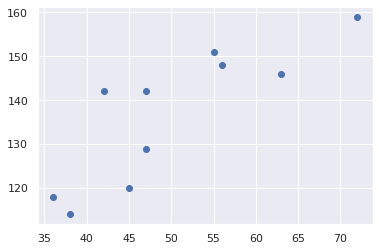

In [ ]:
x = presion['edad']
y = presion['presion']
plt.scatter(x,y)


3. Genera una regresión líneal para obtener una aproximación de la ecuación 
$$
y = ax + b
$$
donde $ a $ se conoce comúnmente como * pendiente *, y $ b $ se conoce comúnmente como * intersección *.

¿Cuál es el valor de a y cuál es el valor de b?

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:

lm1 = LinearRegression()

lm1.fit(presion[['edad']], presion['presion'])
print('valor de b: ', lm1.intercept_)
print('valor de a: ', lm1.coef_)

valor de b:  79.36850719269533
valor de a:  [1.14833319]


4. Gráfica los datos reales vs modelo obtenido. 

Se debe visualizar los datos reales ( azules) 
Recta del modelo ( negra) 
Distancias ( verde ) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':


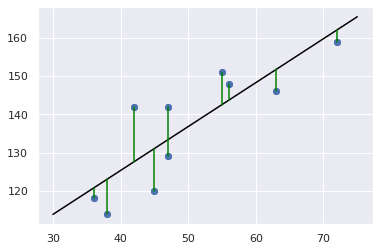

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(30, 75, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color="black");
plt.plot(x,y, 'o')
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="green");

4. ¿Cuál es la presión arterial esperada para una persona de 76 años?

Genera una función que calcule lo anterior

In [ ]:
edad_calcular=76

def presion(edad):
  y = lm1.coef_ * edad + lm1.intercept_
  return y

presion(edad_calcular)

array([166.64182961])

**Ventas de mi negocio**

Nuestro objetivo será contruir un modelo que prediga las ventas del producto dependiendo de cuánto presupuesto se gaste en cada medio.

1. Carga los datos del archivo AdvmiNegocio.csv

In [ ]:
      advmi = pd.read_csv('data/AdvmiNegocio.csv')
advmi = advmi.iloc[:, 1:]
advmi.head()

,Redes,Youtube,TV,sales
0,6903,1134,2076,663
1,1335,1179,1353,312
2,516,1377,2079,279
3,4545,1239,1755,555
4,5424,324,1752,387


2. Generar una grafica para visuaizar  cómo se relaciona cada columna de presupuesto contra las ventas. De mi negocio. ( Redes,Youtube,TV)


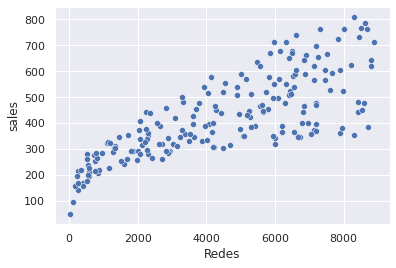

In [ ]:
sns.scatterplot(data= advmi, x='Redes', y='sales')

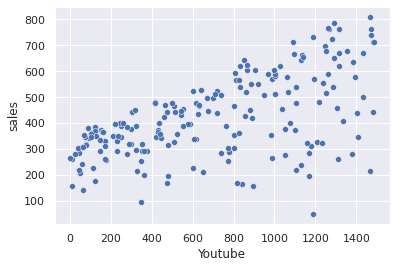

In [ ]:
sns.scatterplot(data= advmi, x='Youtube', y='sales')

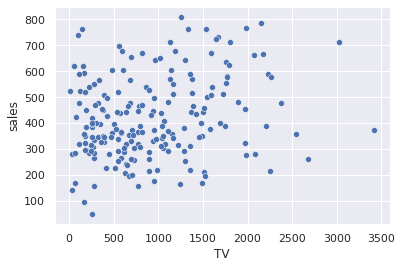

In [ ]:
sns.scatterplot(data= advmi, x='TV', y='sales')

3. ¿ Qué conclusiones puedes obtener de las graficas anteriores?
De las siguientes graficas podemos concluir que: 
Entre más vistas en las redes haya, las ventas son mayores.
Entre más vistas en youtube haya, las ventas son mayores, aunque hay una mayor variación.
La relación en las ventas y la Tv es mucho más difusa.

4. **Regresión lineal**. En su forma más simple, consiste en asumir que una variable $x$ y una variable $y$ presentan una relación lineal de la forma:

$$ y \approx \beta_0 + \beta_1 \cdot x$$

¿Cuál es el valor de beta_0 , beta_1 y el Score  para Redes vs Ventas, TV vs Ventas y YouTube vs Ventas?

In [ ]:
from sklearn.linear_model import LinearRegression

lmt = LinearRegression()
lmt.fit(advmi[['TV']], advmi['sales'])
print('beta_0: ', lmt.intercept_)
print('beta_1: ', lmt.coef_)
print('Score: ', lmt.score(advmi[['TV']], advmi['sales']), '\n')

lmr = LinearRegression()
lmr.fit(advmi[['Redes']], advmi['sales'])
print('beta_0: ', lmr.intercept_)
print('beta_1: ', lmr.coef_)
print('Score: ', lmr.score(advmi[['Redes']], advmi['sales']), '\n')

lmy = LinearRegression()
lmy.fit(advmi[['Youtube']], advmi['sales'])
print('beta_0: ', lmy.intercept_)
print('beta_1: ', lmy.coef_)
print('Score: ', lmy.score(advmi[['Youtube']], advmi['sales']), '\n')

beta_0:  370.5422120783448
beta_1:  [0.0546931]
Score:  0.05212044544430494 

beta_0:  210.97780647383084
beta_1:  [0.04753664]
Score:  0.611875050850071 

beta_0:  279.3491428547485
beta_1:  [0.20249578]
Score:  0.33203245544529536 



5. ¿Cuál de los modelos es mejor de acuerdo al score ordenalos del mejor al peor?

1 - Redes

2 - Youtube

3 - TV

6.  **Regresión lineal múltiple**. Como ahora vamos a incluir más de una variable, el modelo se rescribe a :

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_1 + \hat{\beta}_2 \cdot x_2 + \hat{\beta}_3\cdot x_3 + \ldots \epsilon $$

Elige  las diferentes combinaciones de variables. Ejemplo: Redes y Youtube vs Ventas 

¿Cuál es el valor de beta_0, betas_1 , beta_2 , el score y el score ajustado?



In [ ]:
def score_adj(x, y, model):
    return 1 - (1-model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)

lmtr = LinearRegression()
lmtr.fit(advmi[['TV', 'Redes']], advmi['sales'])
print('TV y Redes')
print('beta_0: ', lmtr.intercept_)
print('betas: ', lmtr.coef_)
print('Score: ', lmtr.score(advmi[['TV', 'Redes']], advmi['sales']), '\n')
print('Score ajustado:', score_adj(advmi[['TV', 'Redes']], advmi['sales'], lmtr), '\n')

lmty = LinearRegression()
lmty.fit(advmi[['TV', 'Youtube']], advmi['sales'])
print('TV y Redes')
print('beta_0: ', lmty.intercept_)
print('betas: ', lmty.coef_)
print('Score: ', lmty.score(advmi[['TV', 'Youtube']], advmi['sales']), '\n')
print('Score ajustado:', score_adj(advmi[['TV', 'Youtube']], advmi['sales'], lmty), '\n')

lmry = LinearRegression()
lmry.fit(advmi[['Redes','Youtube']], advmi['sales'])
print('Redes y Youtube')
print('beta_0: ', lmry.intercept_)
print('betas: ', lmry.coef_)
print('Score: ', lmry.score(advmi[['Redes','Youtube']], advmi['sales']))
print('Score ajustado:', score_adj(advmi[['Redes', 'Youtube']], advmi['sales'], lmry), '\n')

TV y Redes
beta_0:  173.24843903734907
betas:  [0.04421942 0.04690121]
Score:  0.6458354938293271 

Score ajustado: 0.6422399150864777 

TV y Redes
beta_0:  275.6676137758969
betas:  [0.00664417 0.19904459]
Score:  0.33270518395032256 

Score ajustado: 0.3259306172899198 

Redes y Youtube
beta_0:  87.63299737215414
betas:  [0.04575482 0.18799423]
Score:  0.8971942610828956
Score ajustado: 0.8961505479974428 



7.  ¿Cuál modelo es el que nos conviene elegir?


Después de obtener nuestros datos llegamos a conclusión que los mejores modelos son el de redes y youtube ya que tienen un mejor score, al igual por medio de las graficas podemos nootar que hay una mejor correlación en estos tipos.